### Overparametrized models - polynomial demo

In [Wilson](https://arxiv.org/pdf/2503.02113), the paper which insired this project,
a high-degree polynomial regressor with degree-dependent regularisation is used as a
running example. Despite the simplicity of the model and its overparametrization, it
generalises well. This demo notebook is a starting point where I will work on
reproducing this example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import inv
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
float_formatter = '{:.2g}'.format
np.set_printoptions(formatter={'float_kind':float_formatter})

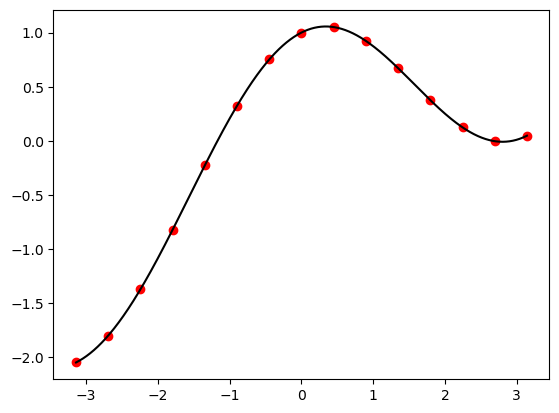

In [3]:
X_sample = np.linspace(-np.pi, np.pi, 15)
Y_true_sample = X_sample / 3 + np.cos(X_sample)

X_full = np.linspace(-np.pi, np.pi, 10001)
Y_true_full = X_full / 3 + np.cos(X_full)

plt.plot(X_full, Y_true_full, color='black')
plt.scatter(X_sample, Y_true_sample, color='red')

In [4]:
def plot_unbiased(n: int) -> None:
    poly_n = PolynomialFeatures(degree=n)
    X_sample_poly_n = poly_n.fit_transform(X_sample.reshape(-1,1))
    X_full_poly_n = poly_n.fit_transform(X_full.reshape(-1,1))
    lin = LinearRegression().fit(X_sample_poly_n, Y_true_sample)
    Y_pred_full = lin.predict(X_full_poly_n)
    plt.plot(X_full, Y_true_full, color='black')
    plt.scatter(X_sample, Y_true_sample, color='red')
    plt.plot(X_full, Y_pred_full, color='blue')
    coef = lin.coef_
    print("log |coefficients|:")
    print(np.log(np.abs(coef)))

log |coefficients|:
[-inf -1.1 -0.81 -34 -3.7 -36]


/tmp/ipykernel_247995/3102733416.py:12: RuntimeWarning: divide by zero encountered in log
  print(np.log(np.abs(coef)))


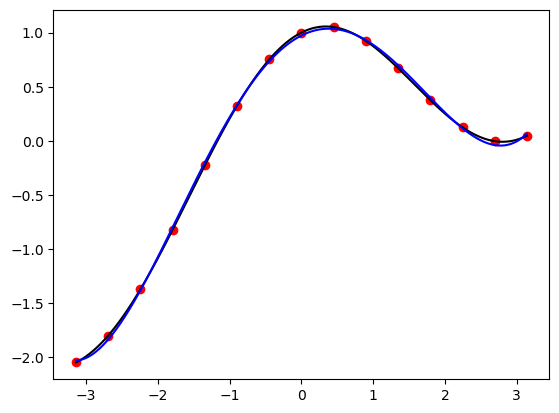

In [5]:
plot_unbiased(5)

log |coefficients|:
[-inf -1.1 -0.69 -28 -3.2 -29 -6.6 -31 -11 -34 -15]


/tmp/ipykernel_247995/3102733416.py:12: RuntimeWarning: divide by zero encountered in log
  print(np.log(np.abs(coef)))


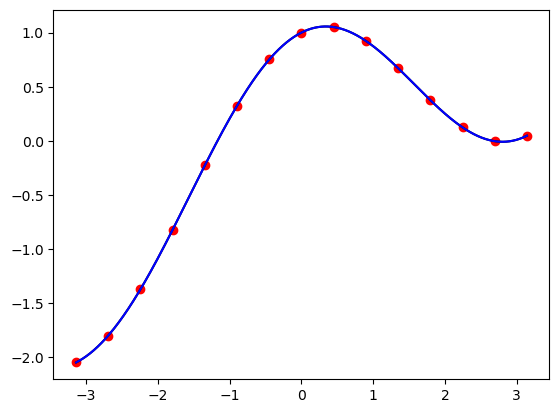

In [6]:
plot_unbiased(10)

log |coefficients|:
[-16 -1.1 -0.71 -3.8 -4.5 -3.9 -3 -4.6 -3.9 -5.1 -4.3 -4.7 -3.9 -5 -4.2
 -6.4 -5.6 -8.6 -7.8 -12 -11]


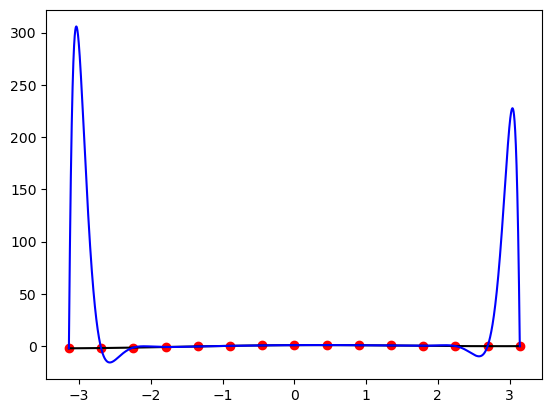

In [7]:
plot_unbiased(20)

log |coefficients|:
[-1.1e+02 -1.2e+02 -1.3e+02 -1.3e+02 -1.4e+02 -1.3e+02 -1.3e+02 -1.3e+02
 -1.3e+02 -1.3e+02 -1.3e+02 -1.4e+02 -1.3e+02 -1.3e+02 -1.3e+02 -1.4e+02
 -1.3e+02 -1.4e+02 -1.3e+02 -1.4e+02 -1.3e+02 -1.4e+02 -1.3e+02 -1.4e+02
 -1.3e+02 -1.4e+02 -1.3e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02
 -1.4e+02 -1.5e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02
 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.5e+02 -1.4e+02
 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02 -1.4e+02
 -1.4e+02 -1.3e+02 -1.3e+02 -1.3e+02 -1.3e+02 -1.3e+02 -1.3e+02 -1.3e+02
 -1.3e+02 -1.3e+02 -1.3e+02 -1.2e+02 -1.2e+02 -1.2e+02 -1.2e+02 -1.2e+02
 -1.2e+02 -1.2e+02 -1.2e+02 -1.2e+02 -1.2e+02 -1.1e+02 -1.1e+02 -1.1e+02
 -1.1e+02 -1.1e+02 -1.1e+02 -1.1e+02 -1.1e+02 -1.1e+02 -1.1e+02 -1e+02
 -1e+02 -1e+02 -1e+02 -1e+02 -1e+02 -98 -99 -96 -97 -95 -96 -97 -98]


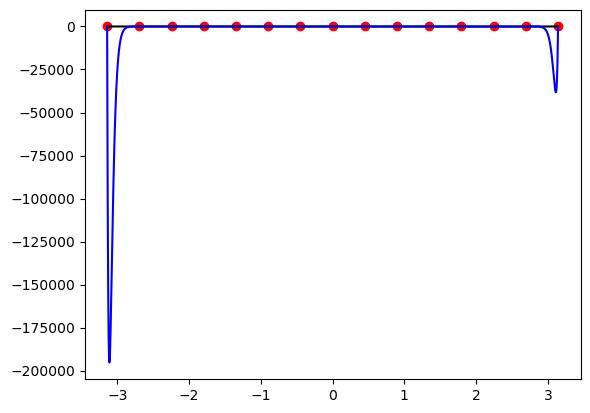

In [8]:
plot_unbiased(100)

As the plots above show, a polynomial regressor with high degree and no weight-dependent regularisation
fails to generalise well. The modified function below implements the example regularisation term,
$$\sum_i \gamma^i w_i^2, \quad \gamma > 0$$

In [9]:
def plot_biased(n: int, penalty_factor: float = 1.0, gamma = 1.1) -> None:
    poly_n = PolynomialFeatures(degree=n)
    X_sample_poly_n = poly_n.fit_transform(X_sample.reshape(-1,1))
    X_full_poly_n = poly_n.fit_transform(X_full.reshape(-1,1))
    
    def loss(theta):
        predictions = X_sample_poly_n @ theta
        mse = ((predictions - Y_true_sample) ** 2).mean()
        
        weights = (gamma ** np.arange(len(theta))) * penalty_factor
        regularization = (weights * theta).sum()
        
        return mse + regularization
    
    theta0 = np.zeros(X_sample_poly_n.shape[1])
    
    res = minimize(loss, theta0)
    theta_opt = res.x
    
    Y_pred_full = X_full_poly_n @ theta_opt
    plt.plot(X_full, Y_true_full, color='black')
    plt.scatter(X_sample, Y_true_sample, color='red')
    plt.plot(X_full, Y_pred_full, color='blue')
    print(res)

We'll see a failure to converge when we try this, which we'll explore further shortly.

As a sanity check, though, we use a degenerate case where the penalty factor is zero, as well as a small degree for numerical stability.

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.00048437433783272873
        x: [ 9.728e-01  3.333e-01 -4.444e-01  4.626e-06  2.496e-02
            -3.918e-07]
      nit: 13
      jac: [ 4.257e-07  1.083e-06  2.672e-06  3.840e-07  1.753e-05
             5.665e-06]
 hess_inv: [[ 1.730e+00  2.243e-02 ...  6.225e-02  5.171e-04]
            [ 2.243e-02  2.735e+00 ...  7.511e-04  6.630e-02]
            ...
            [ 6.225e-02  7.511e-04 ...  5.977e-03  1.754e-05]
            [ 5.171e-04  6.630e-02 ...  1.754e-05  2.337e-03]]
     nfev: 348
     njev: 48


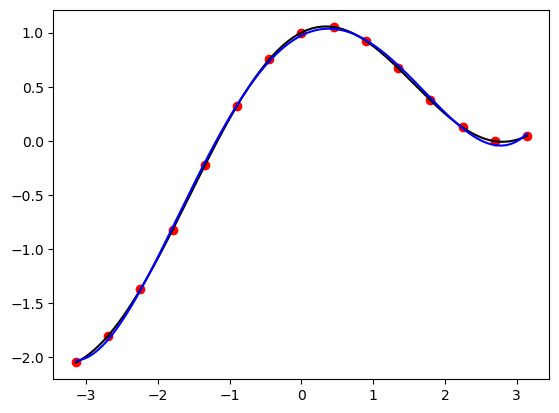

In [10]:
plot_biased(5, 0.0, 1.01)

We have an accurate model in this case.

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1.2624466166077863
        x: [ 1.965e+00 -2.828e+00 -9.286e+00  1.695e+00  6.899e+00
            -2.862e-01 -1.908e+00  1.687e-02  2.202e-01 -2.009e-04
            -8.953e-03]
      nit: 28
      jac: [ 3.725e-06 -1.460e-06 -1.401e-06 -2.533e-06 -2.414e-06
            -2.500e-05 -2.891e-06 -2.099e-04 -5.889e-05 -1.821e-03
            -6.265e-04]
 hess_inv: [[ 3.923e+00  6.726e-01 ...  1.328e-03 -7.619e-03]
            [ 6.726e-01  1.147e+01 ...  2.500e-02 -4.377e-05]
            ...
            [ 1.328e-03  2.500e-02 ...  1.071e-04 -3.085e-06]
            [-7.619e-03 -4.377e-05 ... -3.085e-06  6.857e-05]]
     nfev: 840
     njev: 69


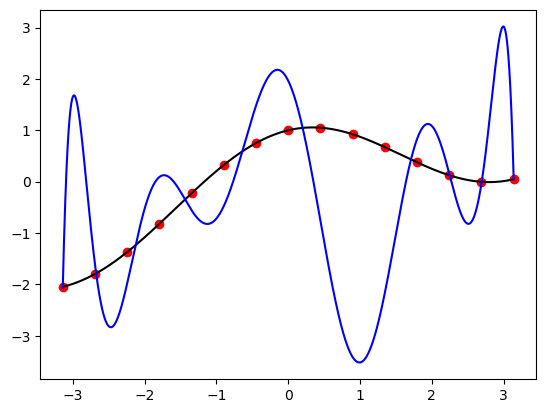

In [11]:
plot_biased(10, 1.0, 1.01)

We've got a failure to converge. At this point I solved for the weights analytically to see if we could just substitute them in.

We've got vectors $\mathbf{x}$, $\mathbf{y}$ of sample data, and weights $\mathbf{w}$.
Our prediction for $y_i$ is $w_j x_i^j$, so the MSE loss for $N$ samples is $\frac{1}{N} \sum_i (w_j x_i^j - y_i)^2$.
As our regularisation term, we've used $a \sum_j w_j^2 \gamma^j$.

So our total loss as a function of $\mathbf{w}$ is
$$ \mathcal{L} (\mathbf{w}) =  \frac{1}{N} \sum_i (w_j x_i^j - y_i)^2 + a w_j^2 \gamma^j $$
which yields (abandoning Einstein summation for the $k$ index)
$$ \partial_{w_k} \mathcal{L} =  \frac{2}{N} \sum_i x_i^k(w_j x_i^j - y_i) + 2a w_k \gamma^k $$
Let $\Gamma$ be the diagonal matrix such that $\gamma_{ii} = \gamma^i$. Let $X$ be the matrix with $x_{ij} = x_i^j$. Then
$$ \nabla \mathcal{L} = \frac{2}{N} [ (X^T X + Na \Gamma)\mathbf{w} - X^T y ] $$
therefore, when the gradient is $0$, we have
$$ \mathbf{w} = (X^T X + Na \Gamma)^{-1} X^T y $$
note we get the ordinary least squares formula if we let $a=0$.

Continuing, for a moment, to ignore numerical stability, let's naively calculate these weights in numpy.

In [12]:
def weights(max_k: int, penalty_factor: float, gamma: float) -> np.ndarray:
    indices = np.arange(0, max_k + 1)
    N = X_sample.shape[0]
    gamma_matrix = np.diag(gamma ** indices)
    X_matrix = X_sample.reshape(-1,1) ** indices.reshape(1,-1)
    y_col = Y_true_sample.reshape(-1,1)
    numerator = X_matrix.T @ y_col
    denominator = (X_matrix.T @ X_matrix) + (N * penalty_factor * gamma_matrix)
    weights_col = inv(denominator) @ numerator
    weights = weights_col.reshape(-1)
    print("log |coefficients|:")
    print(np.log(np.abs(weights)))
    return weights

In [13]:
weights(10, 1.0, 1.1)

log |coefficients|:
[-1.6 -2.9 -3.2 -3 -7.6 -3.7 -3.6 -5.1 -5.2 -7.9 -8.2]


array([0.2, 0.057, 0.042, 0.047, -0.00052, 0.026, -0.028, -0.0064, 0.0053,
       0.00036, -0.00026])

As as sanity check, let's compare these to the weights we got from sklearn if we have no regularisation.

For $N = 10$, we got
```
log |coefficients|:
[-inf -1.1 -0.69 -28 -3.2 -29 -6.6 -31 -11 -34 -15]
 ```

In [14]:
_ = weights(10, 0.0, 0.0)

log |coefficients|:
[-2.6e-07 -1.1 -0.69 -32 -3.2 -32 -6.6 -36 -11 -39 -15]


These don't match exactly but are close; this is likely a numerical instability issue, or incomplete convergence in the sklearn model. This degenerate case still gives a good model, as we can see if we modify our new plotting function to generate the new weights.

In [15]:
def plot_biased_mod(n: int, penalty_factor: float = 1.0, gamma = 1.1) -> None:
    poly_n = PolynomialFeatures(degree=n)
    X_sample_poly_n = poly_n.fit_transform(X_sample.reshape(-1,1))
    X_full_poly_n = poly_n.fit_transform(X_full.reshape(-1,1))
    
    theta_opt = weights(n, penalty_factor, gamma)
    
    Y_pred_full = X_full_poly_n @ theta_opt
    plt.plot(X_full, Y_true_full, color='black')
    plt.scatter(X_sample, Y_true_sample, color='red')
    plt.plot(X_full, Y_pred_full, color='blue')

log |coefficients|:
[-2.6e-07 -1.1 -0.69 -32 -3.2 -32 -6.6 -36 -11 -39 -15]


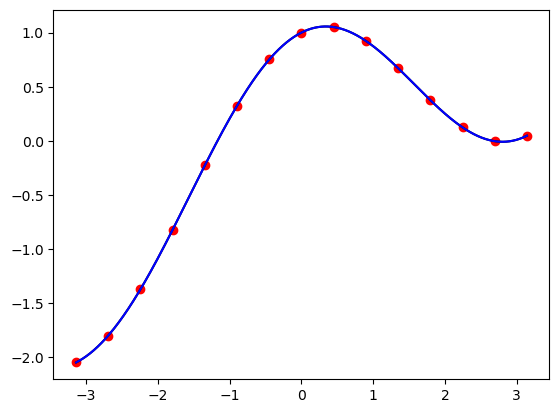

In [16]:
plot_biased_mod(10, 0.0, 0.0)

However, when we use the regularisation term, things start to go wrong:

log |coefficients|:
[-1.7 -2.8 -7.1 -3.6 -4.5 -4.6 -5 -6.6 -7.1 -10 -11]


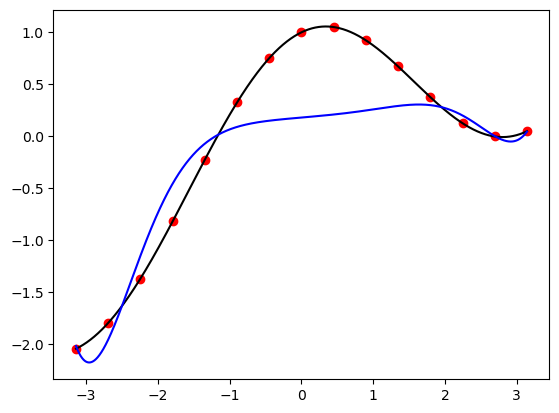

In [27]:
plot_biased_mod(10, 1.1, 2.0)

log |coefficients|:
[-16 -1.1 -0.71 -3.8 -4.5 -3.9 -3 -4.6 -3.9 -5.1 -4.3 -4.7 -3.9 -5 -4.2
 -6.4 -5.6 -8.6 -7.8 -12 -11]


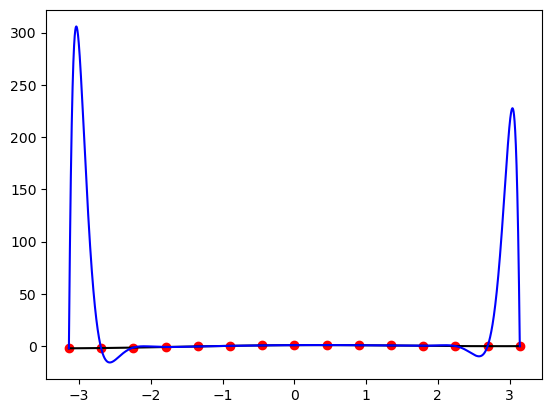

In [28]:
plot_unbiased(20)

log |coefficients|:
[-1.6 -3.1 -4.3 -4.3 -6.3 -5.2 -7.6 -6.1 -7.9 -6.9 -8 -7.8 -8.2 -8.7 -8.5
 -9.8 -8.9 -11 -9.5 -13 -16 -12 -10 -12 -14 -16 -13 -15 -16 -17 -19 -20
 -24 -22 -22 -30 -26 -27 -26 -31 -30 -31 -38 -33 -35 -35 -36 -37 -38 -41
 -41]


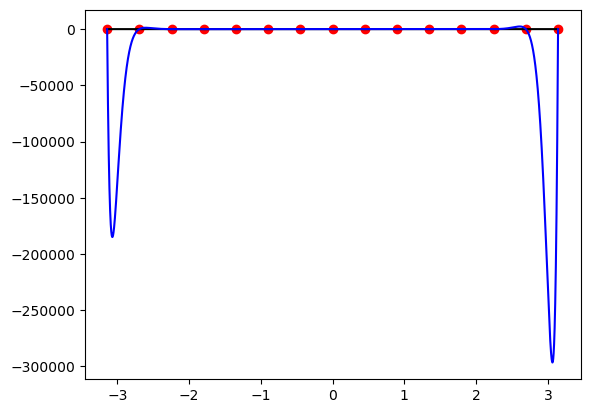

In [29]:
plot_biased_mod(50, 1.0, 2.0)